<a href="https://colab.research.google.com/github/styagi7/Capstone/blob/styagi/NLP_Automated_Ticket_Assignment_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Great Learning - Capstone Project - NLP | Automated Ticket Assignment
*  **Submitted By**: Gaurav, Karishma, Lavanya, Pallavi and Swati 
* **Status** : In-Progress (EDA, Feature Engineering & Selection)
* **Date of Submission** : 29-March-2020
* **Dataset** : https://drive.google.com/drive/u/0/folders/1xOCdNI2R5hiodskIJbj-QySMQs6ccehL

# Problem Statement
One of the key activities of any IT function is to ensure there is no impact to the Business operations through Incident Management process. An incident is an unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business.

The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

These incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). 

**The goal of this project is to build a classifier that can classify the incidents by analysing text**.


# Solution
The solution is to build a classification model that can analyse the text and classify to appropriate Service Desk team.

# Approach


*   Analyse and Understand the structure of data
*   Visualize data
*   Text preprocessing
*   Create word vocabulary and Tokens
*   Build a Classification model
*   Train the model
*   Test the Model 


## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# changing present working directory
import os
os.chdir("/content/drive/My Drive/Capstone Project/")
os.getcwd()

'/content/drive/My Drive/Capstone Project'

##Import Required Libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_palette("Spectral")
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer

#import DataPreprocessor as DP

from pprint import pprint
from sklearn import preprocessing 

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['received from', 'hi', 'hello','i','am','cc','sir','good morning','gentles','dear','kind','best','please',''])
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.utils import tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


**Reading and Exploring Data**

Reading Data "Input Data Synthetic (created but not used in our project).xlsx". Exploring the data and getting some insights about the data.

In [5]:
# Read Dataset
file_name = "Ticket_Data.xlsx" 
df = pd.read_excel(file_name,encoding='cp1252')
df = df.rename(columns = {"Short description": "Short_description",
                          "Assignment group": "Group"})
DELETE_CALLER = False #True

df.head()

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


**We have created a flag to include or drop "Caller" column**

In [6]:
# Checking Shape of the data
print("Data shape:", df.shape)
print("Data Description:")
df.describe()

Data shape: (8500, 4)
Data Description:


,Short_description,Description,Caller,Group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


*   The dataset has total 8500 records
*   There are missing values in short description and and Description columns.
*   The maximum times the short description has been repeated is 38
*   The maximum times the Description has been repeated in 56
*   The maximum times the caller has repeated is 810
*   The maximum times a group is assigned ticket is 3976

In [7]:
# Drop duplicate rows
df_v1 = df
df_v1 = df_v1.drop_duplicates(keep='first', inplace=False)
df_v1.shape

(8417, 4)

There are 4 duplicate records in the dataset and they are removed.

## Exploratory Data Analysis (EDA)


In [0]:
def wordCloudText(data, title):
  title = ("Most Frequent words in ") + title
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                        max_font_size=40, random_state=42).generate(str(data))
  print(wordcloud)
  fig = plt.figure(1,figsize = (20, 8))
  plt.imshow(wordcloud)
  plt.title(title ,fontsize=30)
  plt.axis('off')
  plt.show()

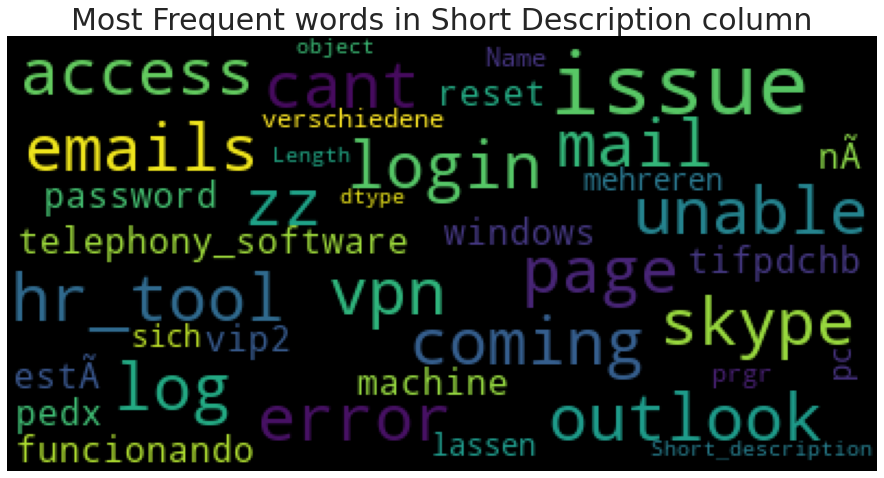

In [9]:
wordCloudText(df.Short_description, 'Short Description column')

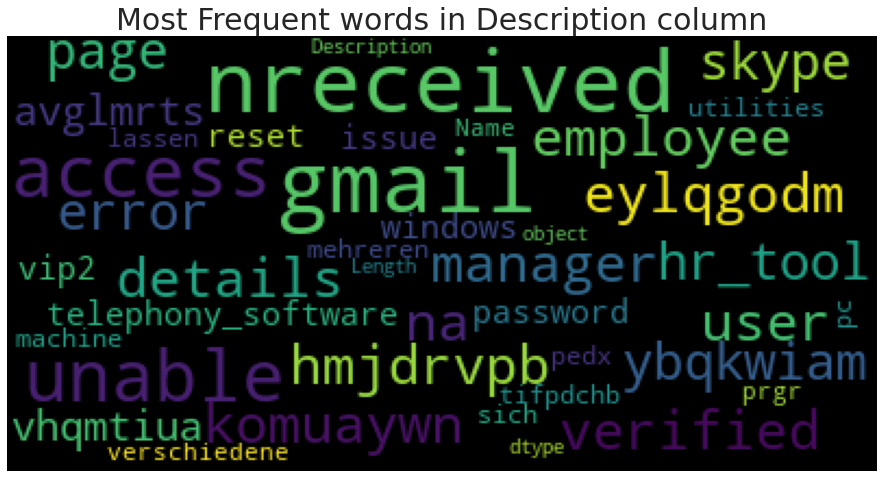

In [10]:
wordCloudText(df.Description, 'Description column')

The Caller column seems to be anonymised data (usernames/ids). This column will be dropped depending on the flag set at **DELETE_CALLER**. 

In [11]:
df_v1 = df
if DELETE_CALLER:
  df_v1 = df.drop('Caller',axis=1)
else:
  df_v1['Caller'] = df_v1['Caller'].apply(lambda x: x.replace(" ", "_"))
df_v1.head(20)

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir_pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb_komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm_ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz_gcpydteq,GRP_0
4,skype error,skype error,owlgqjme_qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn_ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz_clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw_ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct_dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji_sarmtlhy,GRP_0


In [12]:
# Drop duplicate rows
df_v1 = df_v1.drop_duplicates(keep='first', inplace=False)

# Fetch rows with same data in "Short_description" & "Description"
df_v1[df_v1['Short_description'] == df_v1['Description']].count()

Short_description    2818
Description          2818
Caller               2818
Group                2818
dtype: int64

Checking to see if Description and Short_description columns have same data, we see that there are 2862 records that have exactly same data in both the columns.

## Finding & Imputing Null values in Short Description & Description columns

In [13]:
# Check for number of null values in each columns
print("Total Null Values in data:", df_v1.isnull().sum().sum())
print("\nNull Values accross columns:\n", df_v1.isnull().sum())
print("\nData with 'Null' Short Description")
df_v1.loc[df_v1['Short_description'].isnull()==True]

Total Null Values in data: 9

Null Values accross columns:
 Short_description    8
Description          1
Caller               0
Group                0
dtype: int64

Data with 'Null' Short Description


,Short_description,Description,Caller,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl_rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns_fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey_ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo_tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo_efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo_veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm_fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov_ehxkcbgj,GRP_0


In [14]:
print("\nData with 'Null' Description")
df_v1.loc[df_v1['Description'].isnull()==True]


Data with 'Null' Description


,Short_description,Description,Caller,Group
4395,i am locked out of skype,NaN,viyglzfo_ajtfzpkb,GRP_0


Replacing the missing values with the common word 'the'.

In [15]:
# Impute missing values
df_v1['Short_description'].fillna('the', inplace=True) # replacing null values with stopword 'the'
df_v1['Description'].fillna('the', inplace=True) # replacing null values with stopword 'the'

print("Null values imputed")
print("Null Values in data after imputation:", df_v1.isnull().sum().sum())

Null values imputed
Null Values in data after imputation: 0


## Visualizations

### Group data visualization

In [16]:
#Creating dataframe of Groups on the basis of their value counts
n_grp = list(df_v1['Group'].value_counts())
grp_name = list(df_v1['Group'].value_counts().index)
grp = pd.DataFrame(data=grp_name,columns=['grp_name'])
grp['n_grp'] = n_grp
print(len(grp['n_grp']))
print(grp.head())

74
  grp_name  n_grp
0    GRP_0   3934
1    GRP_8    645
2   GRP_24    285
3   GRP_12    257
4    GRP_9    252


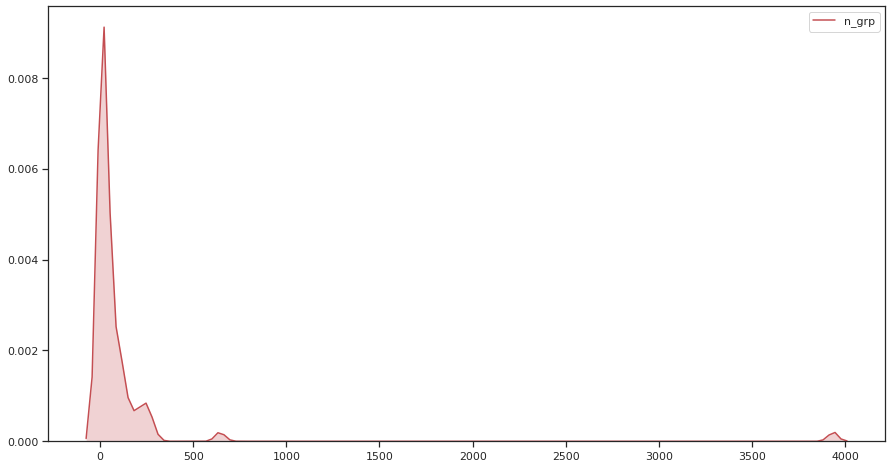

In [17]:
# Checking the distribution of groups
#df['Group'].hist(figsize=(40,10),bins=74)
#plt.xticks(rotation=90, ha='right')
#plt.tight_layout()
plt.figure(figsize=(15,8))
sns.kdeplot(grp['n_grp'], shade=True, color="r")

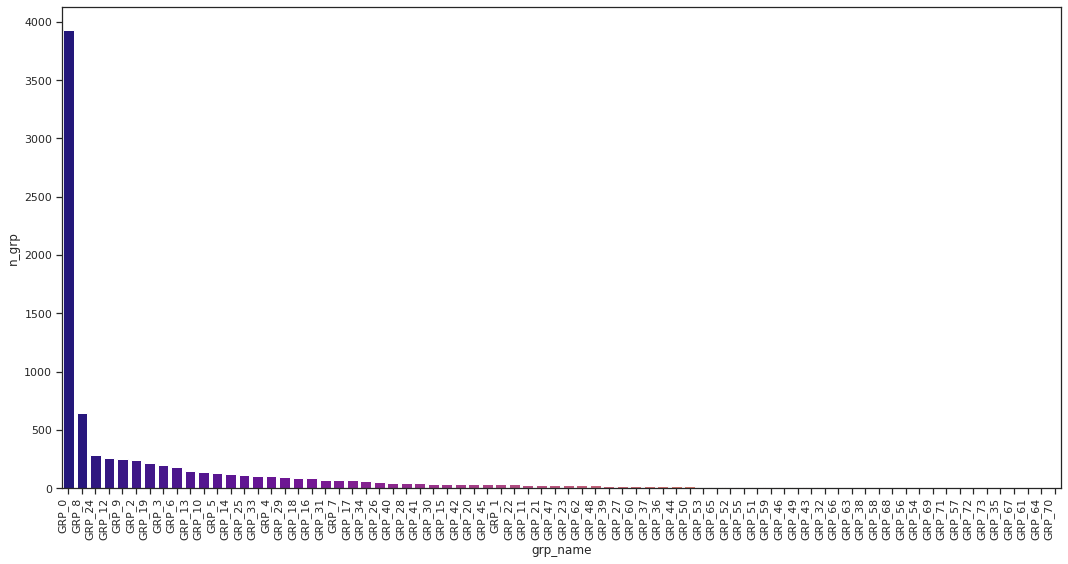

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x="grp_name", y="n_grp", data=grp,palette='plasma')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [19]:
fig = px.pie(grp,values='n_grp', names='grp_name')
fig.show()

There are total of 74 groups to which tickets are assigned to. The ticket assignment is not symmetric and few groups have as minimum as one ticket assigned. The data has a class imbalance.

To address imbalanced class in this project, we merge minority classes into one group. For "Assignment Group" where number of tickets in the category is less than specified frequency, we mark them into "GRP_Manual". All "GRP_Manual" tickets should be triaged manually, until the model has enough data to categorise them automatically.

Merging the minority class will improve the F1 score as we classify less assigned class into a group.


In [20]:
# Reset Assignment Group for group types with less data
Frequency_Threshold = 50 #5
count = df_v1['Group'].value_counts(ascending=True)
idx = count[count.lt(Frequency_Threshold)].index
df_v1.loc[df_v1['Group'].isin(idx), 'Group'] = 'GRP_Manual'
print("Updated unique group types",df_v1['Group'].nunique())
df_v1['Group'].value_counts(ascending=True)


Updated unique group types 25


GRP_26          56
GRP_34          62
GRP_7           68
GRP_17          68
GRP_31          69
GRP_16          85
GRP_18          88
GRP_29          97
GRP_4          100
GRP_33         107
GRP_25         116
GRP_14         118
GRP_5          128
GRP_10         140
GRP_13         145
GRP_6          183
GRP_3          200
GRP_19         215
GRP_2          241
GRP_9          252
GRP_12         257
GRP_24         285
GRP_8          645
GRP_Manual     758
GRP_0         3934
Name: Group, dtype: int64

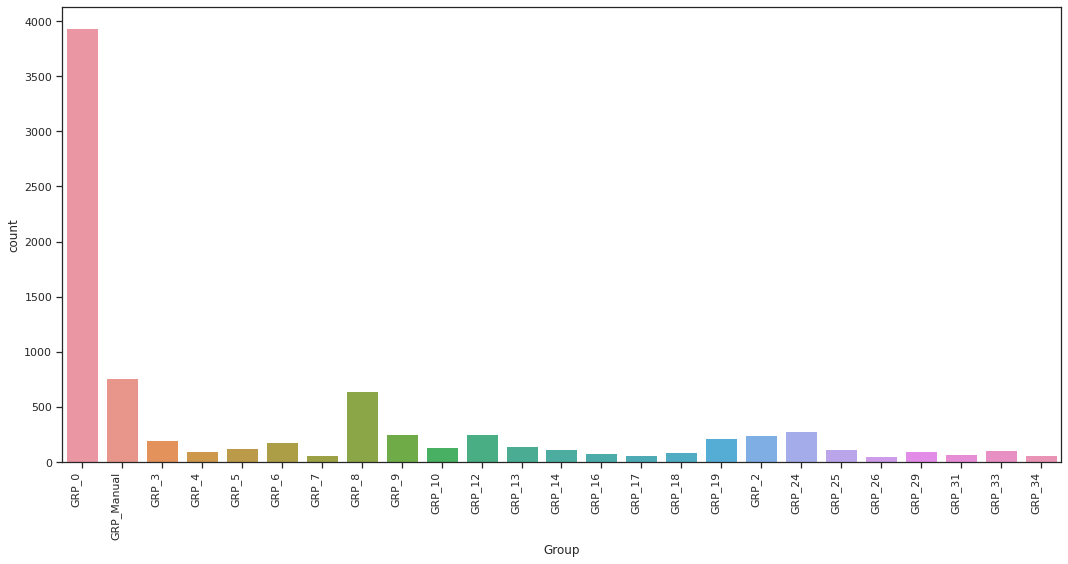

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x="Group", data=df_v1)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

**After grouping the less assigned class (minority class) into one group (GRP_Manual), we now have 25 groups**

### Caller data visualization

In [22]:
caller_data=pd.DataFrame(df_v1['Caller'].value_counts().to_frame()).T
caller_data

,bpctwhsn_kzqsbmtp,ZkBogxib_QsEJzdZO,fumkcsji_sarmtlhy,rbozivdq_gmlhrtvp,rkupnshb_gsmzfojw,jloygrwh_acvztedi,spxqmiry_zpwgoqju,oldrctiu_bxurpsyi,dkmcfreg_anwmfvlg,jyoqwxhz_clhxsoqy,olckhmvx_pcqobjnd,efbwiadp_dicafxhv,afkstcev_utbnkyop,gzhapcld_fdigznbk,mnlazfsr_mtqrkhnx,uvrbhlnt_bjrmalzi,entuakhp_xrnhtdmk,jionmpsf_wnkpzcmv,vzqomdgt_jwoqbuml,bozdftwx_smylqejw,rxoynvgi_ntgdsehl,utyeofsk_rdyzpwhi,qasdhyzm_yuglsrwx,vbwszcqn_nlbqsuyv,ugyothfz_ugrmkdhx,niptbwdq_csenjruz,vfrdxtqw_jfbmsenz,hbmwlprq_ilfvyodx,pfzxecbo_ptygkvzl,ughzilfm_cfibdamq,mfeyouli_ndobtzpw,uxgrdjfc_kqxdjeov,xwirzvda_okhyipgr,ctvaejbo_mjcerqwo,obanjrhg_rnafleys,wktesmbp_lorjymef,tqfnalpj_qyoscnge,aorthyme_rnsuipbk,vkzwafuh_tcjnuswg,rdfjsawg_zpmxgdcw,...,gpevdzct_txconyhd,xbgwfmvj_oemxazyl,orjcgtyz_worylufs,puxiomgy_ndjorwab,dzrbwhco_frmhpwda,hqbxstoy_mdjftxli,ihuogcqd_ihusvgcw,dsyzveju_ivmprauh,ifsrenpq_lkembgtd,cobdhkmj_bikjecaz,pmgzhivt_shexujmb,aeykqxlr_brpdswvu,rmxqfivn_pfgcirlh,wnvlmsjr_znbvlygd,htzauevc_nhxlvkta,yfqoaepn_xnezhsit,mopuczxh_mflsykip,ptgwfymc_mchpwvgf,etlfrucw_ziewxqof,zlkhvseb_bpzvrhsj,ctixyzku_jitrahgx,igfbkzne_duyinzmx,oebcqfli_zvbxasky,hpeknoam_yrfowmva,jtwykasf_elkhcjqn,inqogkxz_rgmslhjn,qpysibeo_zpekrnbu,ovxrzwac_clhxuzgy,vlcexqpg_vjrtqobx,iqpuxcbj_nbaztpms,gkxsnaty_ibeawmjt,zreijwsb_jnrxugpd,wkqjcfgy_vsknlfri,vpnxjtyz_wmakhpci,plzsntqj_ujdyobsk,bqdlegnp_lnphmsco,axesnghb_cyzuomxa,pvjdtrya_oevyhtdx,hwcisuvt_omepbihv,usdykwvf_oswvlmje
Caller,788,151,128,72,71,64,63,57,51,51,47,45,32,30,28,27,25,24,23,23,21,21,21,19,17,16,16,16,16,16,15,15,14,14,13,13,13,13,12,12,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


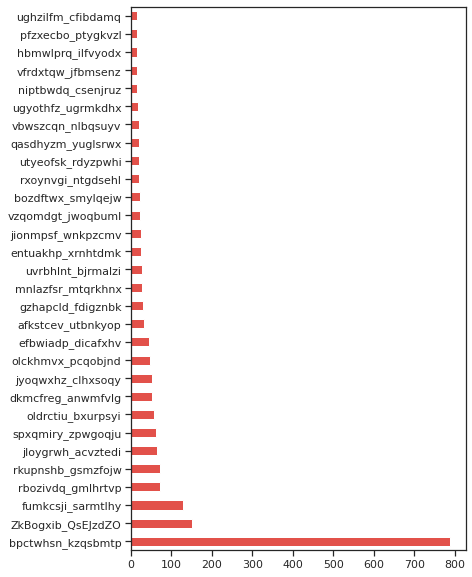

In [23]:
#Visualizing some of the Caller data with anonymous names
plt.figure(figsize=(20, 10))
df_v1['Caller'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [24]:
#Creating dataframe of callers on the basis of their frequency of calling
n_caller = list(df_v1['Caller'].value_counts())
caller = list(df_v1['Caller'].value_counts().index)

data = pd.DataFrame(data=caller,columns=['caller'])
data['n_caller'] = n_caller
len(data['caller'])

2950

In [25]:
#Since caller column contains anonymous data, assigning name Caller1, Caller2,..... for better visualization 
count = 0
new_caller = []
while count != len(data):
    new_caller.append('Caller'+''+ str(count+1))
    count = count +1
data['caller'] = new_caller
data = data.head(20)
data.head(10)

,caller,n_caller
0,Caller1,788
1,Caller2,151
2,Caller3,128
3,Caller4,72
4,Caller5,71
5,Caller6,64
6,Caller7,63
7,Caller8,57
8,Caller9,51
9,Caller10,51


In [26]:
#top 20 callers
fig = px.bar(data, x='caller', y='n_caller',hover_data=['n_caller'])
fig.show()

Analysing the caller data, we see that one caller has reported 810 tickets, and the distribution is skewed. This could be a batch job or an anomaly and should be considered for discussion with domain expert. We are not taking up further analysis of caller for this project, for now.

## Text Cleaning

In [0]:
import string 
import re

# Function for Text Cleaning with regex. Pass the column
def text_preprocessing(df_column):
  data = df_column.values.tolist() # Convert to list
  temp = []
  for sentence in data:
      sentence = sentence.replace("select the following link to view the disclaimer in an alternate language", '')  # remove disclaimer text      
      sentence = re.sub(r"\[(.*?)\]"," ", sentence)  # remove text in []
      sentence = re.sub(r"\((.*?)\)"," ", sentence)  # remove text in ()
      sentence = re.sub(r"[[h][t][t][p][\S]+|[w][w][w][\S]+|[\S]+[@][\S]+"," ", sentence)  # remove email addresses, web address and urls
      sentence = re.sub(r"[\S]+[\d]+[\S]+"," ", sentence) # remove alphanumerics and numerics (dates, time, request id etc.)
      sentence = re.sub(r"\W(?<!['. ])"," ", sentence)  # remove all non words with negative look back except ('. spaces) 
      sentence = re.sub(r"[^a-zA-z.| ]+"," ", sentence) # remove non-alphabetic text
      sentence = re.sub(r"[\_]+"," ", sentence) # remove underscores
      sentence = re.sub(r"[\s]+"," ", sentence) # replace multiple spaces with single space
      sentence = sentence.strip('\n')
      sentence = sentence.lower()
      temp.append(sentence)
  return(temp)

In [28]:
# Cleaned both - 'Short_Description & Description'
df_v1.Short_description = text_preprocessing(df_v1.Short_description)
df_v1.Description = text_preprocessing(df_v1.Description)
df_v1.head()

,Short_description,Description,Caller,Group
0,login issue,verified user details. checked the user name ...,spxjnwir_pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype me...,hmjdrvpb_komuaywn,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm_ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz_gcpydteq,GRP_0
4,skype error,skype error,owlgqjme_qhcozdfx,GRP_0


After cleaning text in Short_description and Description column, the dataset looks as above. Information in both the columns are contributor for classification. Hence we concatenate these two columns so that no information is lost

## Concatenating "Short Description" and "Description" to get "Summary" Tickets

In [29]:
if DELETE_CALLER:
  df_v1["Summary"] = df_v1['Short_description'].str.cat(df_v1['Description'], sep = ". ")
  df_v1["Summary"] = df_v2['Summary'].str.cat(df_v1['Caller'], sep = ". ")  
else:
  df_v1["Summary"] = df_v1['Short_description'].str.cat(df_v1['Description'], sep = ". ") 

df_v2 = df_v1[['Group','Summary']]
df_v2.head(5) 

,Group,Summary
0,GRP_0,login issue. verified user details. checked t...
1,GRP_0,outlook. received from hello team my meetings...
2,GRP_0,cant log in to vpn. received from hi i cannot...
3,GRP_0,unable to access hr tool page. unable to acces...
4,GRP_0,skype error . skype error


**Visualizing the Cleaned data in Summary Column through Word Cloud**

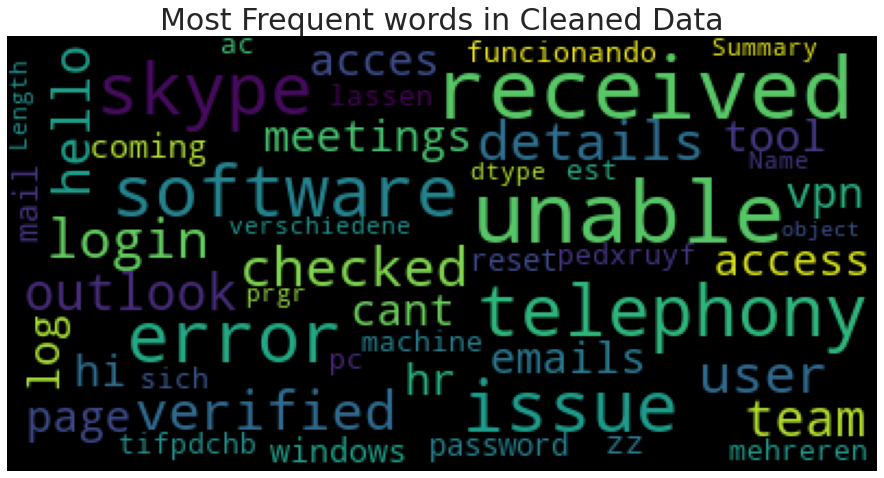

In [30]:
wordCloudText(df_v2.Summary, 'Cleaned Data')

### Stop words Removal, Tokenization and Lemmatization

In [0]:
# word tokenisation & removal of stop words & gibberish word(by typos, anonymised names)

# Remove stopwords
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove words not in Englsih Dictionary (typos, anonymised names)
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))

# Tokenise 'Summary' column
data = df_v2.Summary.values.tolist()
data = [list(tokenize(sentences)) for sentences in data]

# Remove duplicates
temp = []
unique_words_per_row = []
for eachrow in data:
    unique_words_per_row = list(dict.fromkeys(eachrow))
    temp.append(unique_words_per_row)
data = temp
#token_data = data

# lemmetise words
wordnet_lemmatizer = WordNetLemmatizer()
temp = []
for eachrow in data:
    lemma_words = []
    for eachword in eachrow:
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "n")
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "v")
        eachword = wordnet_lemmatizer.lemmatize(eachword, pos = ("a"))
        lemma_words.append(eachword)
    temp.append(lemma_words)
data = temp
  

data = temp 

data = [(" ".join(sentence))  for sentence in data]

df_v2['Summary'] = data
#token_data


### TF-IDF

In this project we will use tf-idf to transforms text to feature vectors.

In [0]:
maxlen = 0
for sentence in data:
    if (maxlen < sentence.count(' ')+1 ):
        maxlen = sentence.count(' ')+1

    
# Create Weighted Word Vectors
tfidf_vectors = TfidfVectorizer(min_df=3,max_features= maxlen)
tfidf_db = tfidf_vectors.fit_transform(data).toarray()
tfidf_db = pd.DataFrame(tfidf_db)

In [33]:
tfidf_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
0,0.277074,0.000000,0.0,0.0,0.372223,0.0,0.0,0.0,0.359943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380498,0.000000,0.0,0.0,0.284258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345602,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.23761,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.529839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41958,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.670052,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.435177,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.398826,0.0,0.0,0.0,0.394481,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#view data
data[0:10]

['login user check name ad reset advise caller confirm able issue',
 'receive team outlook calendar somebody advise correct',
 'cant log receive cannot',
 'unable access tool page',
 'error',
 'unable log engineer tool',
 'event value threshold',
 'employment status new non employee',
 'unable disable add outlook',
 'ticket update']

### Label Encoding

In [35]:
le = preprocessing.LabelEncoder() 
df_v2['Group']= le.fit_transform(df_v2['Group']) # LabelEncode 'Groups'
df_v2.head(20) 

,Group,Summary
0,0,login user check name ad reset advise caller c...
1,0,receive team outlook calendar somebody advise ...
2,0,cant log receive cannot
3,0,unable access tool page
4,0,error
5,0,unable log engineer tool
6,24,event value threshold
7,0,employment status new non employee
8,0,unable disable add outlook
9,0,ticket update


# Model Building

For this dataset, we will build some traditional models and RNN.
*   Multnomial Naive Bayes
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   Ensemble
*   LSTM



**Train and test split**

In [0]:
X = tfidf_db
y = df_v2['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

## Importing packages for Model Building

In [0]:
#import all the packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

##Multinomial Naive Bayes

In [38]:
# Naive Bayes
NBModel = MultinomialNB(alpha = 0.001)
NBModel.fit(X_train, y_train)
NB_y_pred = NBModel.predict(X_test)
print('NB Training Accuracy:', 100*NBModel.score(X_train , y_train))
print('NB Test Accuracy:', 100*NBModel.score(X_test , y_test))

NB Training Accuracy: 60.01980198019802
NB Test Accuracy: 56.994356994357


In [39]:
print ('Precision Score:', precision_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, NB_y_pred, pos_label='Positive', average='weighted'))
F1score = f1_score(NB_y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(confusion_matrix(y_test,NB_y_pred))
print(classification_report(y_test,NB_y_pred))

Precision Score: 0.4764056156309382
Recall Score: 0.56994356994357
F1 Score: 0.6666877750643009
[[1529    0    9    0    0    4    3    1    0    2    3    0    0    0
     4    1    9    0    0    0    0    0    5    0   30]
 [  18    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   23    1   12]
 [  64    0   18    0    4    0    0    0    0    0    1    0    0    0
     1    0    1    1    0    0    0    0    2    0   12]
 [  30    0    0    7    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    3    0    3    0   20]
 [  29    0    1    1    1    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   12]
 [  23    0    0    0    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    5]
 [   4    0    0    0    0    0   22    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0 

## Support Vector Machine

In [40]:
# Creating SVC Model
svm_model = SVC(kernel='linear',C=10)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print('Training Accuracy:', 100*svm_model.score(X_train , y_train))
print('Test Accuracy:',100*svm_model.score(X_test , y_test))


Training Accuracy: 71.46534653465346
Test Accuracy: 58.301158301158296


In [41]:
print ('Precision Score:', precision_score(y_test, y_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(y_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Precision Score: 0.5132087822449792
Recall Score: 0.583011583011583
F1 Score: 0.6509827819603804
[[1478    3   13    3    6    7    2    3    8   10    4    3    5    9
    11    0    0    2    4    1    1    3    2    3   19]
 [  15   20    1    0    0    0    0    0    0    0    0    0    0    1
     0    0    0    0    1    0    3    0    6    0    7]
 [  49    0   24    0    9    0    0    1    4    1    2    1    0    0
     0    0    0    3    1    0    0    0    2    2    5]
 [  22    0    1   20    1    0    0    1    0    0    0    1    1    1
     1    0    1    0    1    1    3    0    3    0    7]
 [  21    0    2    2   11    0    0    0    1    0    0    1    0    0
     1    0    0    0    2    0    0    0    1    0    3]
 [  18    0    1    0    1    9    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0   24    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

## Decision Tree

In [42]:
# Using Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_predict = dt_model.predict(X_test)
print('Training Accuracy:',100*dt_model.score(X_train, y_train))
print('Test Accuracy:',100*dt_model.score(X_test , y_test))

Training Accuracy: 84.73267326732673
Test Accuracy: 52.569052569052566


In [44]:
print ('Precision Score:', precision_score(y_test, y_predict, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, y_predict, pos_label='Positive', average='weighted'))

F1score = f1_score(y_predict, y_test, average='weighted')
print('F1 Score:', F1score)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

Precision Score: 0.4580620115873039
Recall Score: 0.5256905256905257
F1 Score: 0.5723412218789021
[[1298    2   18   15    6   10    4    4   23   24    5   10    3    4
    20    5    6    6   17    2    6    5    4    4   99]
 [  19   19    2    1    0    0    0    0    0    0    0    0    0    3
     1    0    0    0    0    1    1    0    6    0    1]
 [  46    0   22    0    6    0    0    0    0    3    0    1    0    2
     0    0    1    5    3    1    1    0    3    0   10]
 [  29    1    0    8    1    0    0    2    1    1    0    1    0    0
     1    0    0    0    0    0    6    0    3    0   11]
 [  18    0    5    1    8    0    0    1    1    0    0    0    0    0
     0    0    0    0    1    0    0    0    2    0    8]
 [  15    0    0    0    0    7    0    0    1    1    0    0    0    0
     0    0    0    0    1    0    0    1    0    1    2]
 [   3    0    0    0    0    0   23    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    

## Random Forest Classifier

In [45]:
#Using Random Forest Classifier
rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
print('Training Accuracy:', 100*rfcl.score(X_train , y_train))
print('Test Accuracy:',100*rfcl.score(X_test , y_test))

Training Accuracy: 84.7128712871287
Test Accuracy: 58.62785862785863


In [46]:
print ('Precision Score:', precision_score(y_test, test_pred, pos_label='Positive', average='weighted'))
print ('Recall Score:', recall_score(y_test, test_pred, pos_label='Positive', average='weighted'))

F1score = f1_score(test_pred, y_test, average='weighted')
print('F1 Score:', F1score)
print(confusion_matrix(y_test,test_pred))
print(classification_report(y_test,test_pred))

Precision Score: 0.5144909504136048
Recall Score: 0.5862785862785863
F1 Score: 0.6706711332100144
[[1525    1    8    1    1    2    0    3    9    7    2    2    0    0
     6    4    2    1    0    2    0    1    4    1   18]
 [  27   18    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    0    6    0    2]
 [  61    0   24    0    3    0    0    0    1    1    0    1    0    0
     0    0    0    2    2    0    0    0    4    1    4]
 [  42    1    0   10    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    3    0    3    0    4]
 [  25    0    5    0    7    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    2    0    5]
 [  22    0    0    0    1    5    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    1]
 [   3    0    0    0    0    0   23    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    

## Ensemble Techniques

### Bagging Classifier

In [47]:

seed = 1075
np.random.seed(seed)

rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, n_jobs=-1)
    
    print ("Mean of: {1:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean()))

Mean of: 0.482 [Bagging RandomForestClassifier]

Mean of: 0.483 [Bagging ExtraTreesClassifier]

Mean of: 0.483 [Bagging KNeighborsClassifier]

Mean of: 0.479 [Bagging SVC]

Mean of: 0.474 [Bagging RidgeClassifier]



### Voting Classifier with Bagging

In [48]:
# Using Voting Classifier with Bagging
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), 
                                    ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 
                                                     'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.59 (+/- 0.01) [Random Forest]
Accuracy: 0.59 (+/- 0.01) [Extra Trees]
Accuracy: 0.55 (+/- 0.02) [KNeighbors]
Accuracy: 0.59 (+/- 0.01) [SVC]
Accuracy: 0.57 (+/- 0.01) [Ridge Classifier]
Accuracy: 0.59 (+/- 0.01) [Ensemble]


### Boosting Classifier

In [49]:
# Using Boosting Classifiers

ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print("Mean: {0:.3f} of [{1}]".format(scores.mean(), label))

Mean: 0.517 of [Ada Boost]
Mean: 0.565 of [Grad Boost]
Mean: 0.583 of [XG Boost]
Mean: 0.575 of [Ensemble]


Observations:
1. The Training accuracy is 67% and testing accuracy is 58% with Naive Bayes Model. The model can predict True Positives and False Negatives equally.
2. The Training accuracy is around 78% and testing accuracy is around 60% with SVC. The model can predict True Positives and False Negatives equally.
3. The training accuracy is around 88% and testing accuracy is around 54% with Decision Trees. The model can predict True Positives and False Negatives almost equally.
4. The training accuracy is around 88% and testing accuracy is around 60% with Random Forests. The model can predict True Positives and False Negatives almost equally.
5. Ensemble model gives 61% accuracy with hard voting classifier

# Model Tuning

We will fine tune all the models built to see if we can improve the performance

### Multinomial Naive Bayes

In [0]:
#importing required libraries
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score

In [0]:
def find_optimal_k(X,y, lr_list):
  
  # empty list that will hold cv scores
  scores = []
  for lr in lr_list:
    model_nb = MultinomialNB(alpha = lr)
    model = model_nb.fit(X_train, y_train)
    # predict the response on the crossvalidation train
    predict = model.predict(X_test)
    
    # evaluate accuracy
    accuracy = accuracy_score(y_test, predict, normalize=True)
    scores.append(accuracy)
    
    # changing to misclassification error
    mean_square_error = [1 - x for x in scores]

  # determining best alpha
  optimal_alpha = lr_list[mean_square_error.index(min(mean_square_error))]
  print('\nThe optimal alpha is ', optimal_alpha)

  plt.figure(figsize=(10,6))
  plt.plot(lr_list, mean_square_error,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. alpha Value')
  plt.xlabel('alpha')
  plt.ylabel('Error Rate')

  print("the misclassification error for each k value is : ", np.round(mean_square_error,3))
    
  return optimal_alpha



The optimal alpha is  1e-05
the misclassification error for each k value is :  [0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43 0.43
 0.43]
The optimal K found is:  1e-05


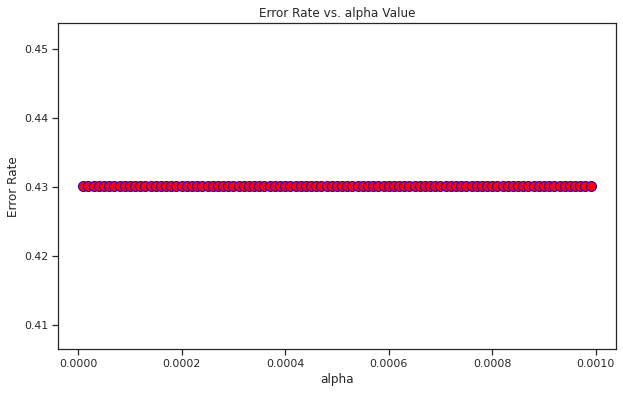

In [55]:
lr_lst = np.arange(0.00001, 0.001, 0.00001)
best_lr = find_optimal_k(X_train ,y_train, lr_lst)
print("The optimal K found is: ", best_lr)

In [56]:
Tuned_NBModel = MultinomialNB(alpha = best_lr)
Tuned_NBModel.fit(X_train, y_train)
NB_y_pred = Tuned_NBModel.predict(X_test)
print('NB Training Accuracy:', Tuned_NBModel.score(X_train , y_train))
print('NB Test Accuracy:', Tuned_NBModel.score(X_test , y_test))

NB Training Accuracy: 0.6005940594059406
NB Test Accuracy: 0.56994356994357


After model tuning, the best training accuracy we found is 60% and testing accuracy is 56%. 

Shuffleshit to find least fit time, and average train and test score

In [57]:
NB_Algorithm = MultinomialNB(alpha = best_lr)

cv_split = ShuffleSplit(n_splits = 10, test_size = .4, train_size = .6, random_state = 42)
cv_results = cross_validate(NB_Algorithm, X,y, cv  = cv_split, return_train_score=True)

print('The least fit time is:', cv_results['fit_time'].mean(), "\nThe training score average is:", cv_results['train_score'].mean(), "\nThe test score average is:",  cv_results['test_score'].mean())

The least fit time is: 0.01877436637878418 
The training score average is: 0.6042376237623761 
The test score average is: 0.5724977724977726


By trying different learning rates, the best value is achieved at 0.0001, which gives a test accuracy of 58.7% and training accuracy of 67.41 %. By using ShuffleSplit with 10 splits(creating random samples of the entire dataset during each iteration to generate a training set and a test set) we get an Average Train Accuracy of 66.6% and Average Test Accuracy of 59.7% with the least fit-time, time for fitting the estimator on the train set for each cv split, of 0.021 seconds.

### Support Vector Machine

The kernel used for SVM in this project is 'linear'. We can use grid search to get optimal parameters that gives best accuracy

In [0]:
#Set parameters for grid search
param = {
 'C': (np.arange(1.4,2.0,0.2)) , 'kernel': ['linear'],
 'C': (np.arange(1.4,2.0,0.2)) , 'gamma': [0.01,0.03,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.03,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
               
#import Grid Search
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, param, cv=10, scoring='accuracy')

In [59]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_params_)

KeyboardInterrupt: ignored

##Decision Tree

In [64]:
#setting parameters for grid search
max_dep_range = [4,5,8,10, 12,15,18,20,25,30, 40,50,60,70,80]
min_lf = np.arange(4,20,2)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': max_dep_range}, {'min_samples_leaf': min_lf}]
GD = GridSearchCV(dt_model, tree_param)
GD.fit(X_train,y_train)
print("Best Hyper Parameters for DT:\n",GD.best_params_)     

Best Hyper Parameters for DT:
 {'criterion': 'entropy', 'max_depth': 15}


In [65]:
#building model with best parameters
DT_model = DecisionTreeClassifier(criterion = 'entropy', max_depth= 15)
DT_model.fit(X_train,y_train)
test_pred_DT = DT_model.predict(X_test)
print('DT train accuracy after Grid Search:', DT_model.score(X_train , y_train))
print('DT test accuracy after Grid Search:', DT_model.score(X_test , y_test))

DT train accuracy after Grid Search: 0.6112871287128713
DT test accuracy after Grid Search: 0.5518265518265518


The training accuracy is 61% and testing accuracy is 55% after runnng the model with Grid search's best parameters. The train accuracy has come down while the test accuracy is slighly more than the inital model. The model seem to be able to gerneralise better but the test accuracy is still not good enough

##Random Forest

In [0]:
param_grid = {'criterion':['gini','entropy'],'n_estimators':[50,100,150,200,250]}
gs = GridSearchCV(rfcl,param_grid)
gs

In [61]:
#get best parameter
gs.fit(X_train,y_train)
print("Best Hyper Parameters:\n",gs.best_params_)

Best Hyper Parameters:
 {'criterion': 'entropy', 'n_estimators': 100}


In [62]:
#Build Modl with best parameters got from Grind Search
rfcl = RandomForestClassifier(criterion = 'gini', n_estimators = 150)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
acc_RFGS = accuracy_score(y_test, test_pred)
print('Training Accuracy:', 100*rfcl.score(X_train , y_train))
print('Test Accuracy:',100*rfcl.score(X_test , y_test))

Training Accuracy: 84.73267326732673
Test Accuracy: 58.83575883575883
